## Support Vector Machine

In [1]:
# if standard deviation is more use svm
# decision boundary
# distance between hyperplanes should be maximum


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [4]:
dataset=pd.read_csv(r'C:/Users/Shambhavi/Downloads/datasets/bill_authentication.csv')

In [5]:
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
dataset.shape

(1372, 5)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Variance    1372 non-null float64
Skewness    1372 non-null float64
Curtosis    1372 non-null float64
Entropy     1372 non-null float64
Class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [9]:
import seaborn as sb

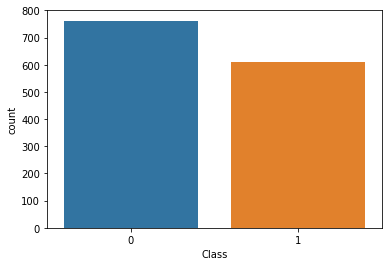

In [10]:
sb.countplot(dataset['Class'])

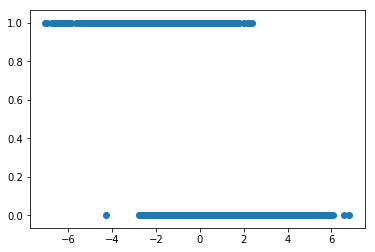

In [11]:
plt.scatter(dataset['Variance'],dataset['Class'])

In [14]:
X=dataset.drop('Class',axis=1)
y=dataset['Class']

In [16]:
X

,Variance,Skewness,Curtosis,Entropy
0,3.621600,8.66610,-2.807300,-0.446990
1,4.545900,8.16740,-2.458600,-1.462100
2,3.866000,-2.63830,1.924200,0.106450
3,3.456600,9.52280,-4.011200,-3.594400
4,0.329240,-4.45520,4.571800,-0.988800
5,4.368400,9.67180,-3.960600,-3.162500
6,3.591200,3.01290,0.728880,0.564210
7,2.092200,-6.81000,8.463600,-0.602160
8,3.203200,5.75880,-0.753450,-0.612510
9,1.535600,9.17720,-2.271800,-0.735350


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [18]:
X_train

,Variance,Skewness,Curtosis,Entropy
1326,-1.29430,2.673500,-0.840850,-2.032300
1109,-0.40857,3.097700,-2.960700,-2.689200
1139,-1.52280,-6.478900,5.756800,0.873250
657,-0.27800,8.188100,-3.133800,-2.527600
704,3.70220,6.994200,-1.851100,-0.128890
828,-2.59120,-0.105540,1.279800,1.041400
1318,-0.49281,3.060500,-1.835600,-2.834000
1272,-4.23330,4.916600,-0.492120,-5.320700
511,3.94330,2.501700,1.521500,0.903000
912,1.22790,4.030900,-4.643500,-3.912500


In [20]:
from sklearn.svm import SVC
clf=SVC(kernel='linear')
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
#C=1.0- confidence 100%

In [22]:
y_pred=clf.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [25]:
len(clf.support_vectors_)

38

In [26]:
clf.score(X_test,y_test)

0.9927272727272727

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99       157
          1       0.98      1.00      0.99       118

avg / total       0.99      0.99      0.99       275

[[155   2]
 [  0 118]]


## Evaluation